In [1]:
# make sure that you have recent version of PyTorch installed
import torch
torch.__version__

'2.0.1+cpu'

In [2]:
# Simple Tensors

a = torch.tensor([[1,2],[3,4]])
print(a)
a = torch.randn(size=(10,3))
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[-0.3999, -0.3125,  0.1672],
        [-1.6263,  0.0508, -0.0576],
        [-0.8227,  1.1711,  2.1704],
        [-0.3568,  1.2593, -1.1006],
        [-0.0819,  0.4842, -0.7202],
        [-2.2272, -1.0841, -1.5139],
        [-0.2273,  0.6264, -1.2234],
        [-0.4906, -1.9045,  0.2680],
        [-0.6976, -1.2698,  1.9019],
        [-0.2665,  0.0282,  0.8089]])


In [3]:
print(a-a[0])
print(torch.exp(a)[0].numpy())  # extracts numpy-array from tensor

tensor([[ 0.0000,  0.0000,  0.0000],
        [-1.2264,  0.3633, -0.2247],
        [-0.4228,  1.4836,  2.0033],
        [ 0.0430,  1.5718, -1.2678],
        [ 0.3180,  0.7967, -0.8874],
        [-1.8274, -0.7716, -1.6811],
        [ 0.1726,  0.9389, -1.3906],
        [-0.0907, -1.5920,  0.1008],
        [-0.2977, -0.9573,  1.7347],
        [ 0.1334,  0.3407,  0.6417]])
[0.6703967  0.73162943 1.181977  ]


In [4]:
# In-place and out-of-place Operations

u = torch.tensor(5)
print("Result when adding out-of-place:",u.add(torch.tensor(3)))
u.add_(torch.tensor(3))
print("Result after adding in-place:", u)

Result when adding out-of-place: tensor(8)
Result after adding in-place: tensor(8)


In [5]:
# sum or all rows in a matrix

s = torch.zeros_like(a[0])
for i in a:
  s.add_(i)

print(s)

tensor([-7.1968, -0.9507,  0.7008])


In [6]:
torch.sum(a,axis=0)

tensor([-7.1968, -0.9507,  0.7008])

In [7]:
# Computing Gradients

a = torch.randn(size=(2, 2), requires_grad=True)
b = torch.randn(size=(2, 2))

c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))  # Do some math using `a`   -   tensor(2.2843, grad_fn=<MeanBackward0>) 

c.backward() # call backward() to compute all gradients
# This function triggers automatic differentiation and computes gradients for all tensors that were involved in the computation of c.
# In this case, it computes the gradient of c with respect to a.

# What's the gradient of `c` with respect to `a`?
print(a.grad)   # Tensor that contains the gradient values. These gradient values represent how a small change in each element of 'a' would affect the value of 'c'.


tensor([[-0.2222,  0.1323],
        [ 0.1367,  0.0582]])


In [8]:
c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
c.backward(retain_graph=True)
c.backward(retain_graph=True)
print(a.grad)
a.grad.zero_()  # to restart computing gradients from scratch, resets grad field to 0 explicitly
c.backward()
print(a.grad)


tensor([[-0.6665,  0.3968],
        [ 0.4100,  0.1745]])
tensor([[-0.2222,  0.1323],
        [ 0.1367,  0.0582]])


In [9]:
# For each tensor that has the requires_grad flag set to True,
# PyTorch maintains a special function called grad_fn, which computes the derivative of the expression according to chain differentiation rule

print(c)    # Here c is computed using mean function, thus grad_fn point to a function called MeanBackward.

tensor(1.1219, grad_fn=<MeanBackward0>)


In [10]:
# computing Jacobians
# if we want to compute the gradient of a tensor with respect to another tensor, PyTorch allows us to compute the product of a Jacobian matrix and a given vector.

c = torch.sqrt(torch.square(a) + torch.square(b))
c.backward(torch.eye(2)) # eye(2) means 2x2 identity matrix -    The size of v should be the same as the size of the original tensor, with respect to which we compute the gradient.
print(a.grad)

tensor([[-1.1108,  0.1323],
        [ 0.1367,  0.2908]])


In [11]:
# Optimization Using Gradient Descent

# Let's try to use automatic differentiation to find a minimum of a simple two-variable function f(x1, x2) = (x1-3)^2 + (x2+2)^2 .

# defining starting value of x and the function f
x = torch.zeros(2,requires_grad=True)
f = lambda x : (x-torch.tensor([3,-2])).pow(2).sum()
lr = 0.1

In [12]:
for i in range(15):
    y = f(x)
    y.backward()
    gr = x.grad
    x.data.add_(-lr*gr)
    x.grad.zero_()
    print("Step {}: x[0]={}, x[1]={}".format(i,x[0],x[1]))

# we are approaching the minimum point at (3,-2)

Step 0: x[0]=0.6000000238418579, x[1]=-0.4000000059604645
Step 1: x[0]=1.0800000429153442, x[1]=-0.7200000286102295
Step 2: x[0]=1.4639999866485596, x[1]=-0.9760000705718994
Step 3: x[0]=1.7711999416351318, x[1]=-1.1808000802993774
Step 4: x[0]=2.0169599056243896, x[1]=-1.3446400165557861
Step 5: x[0]=2.2135679721832275, x[1]=-1.4757120609283447
Step 6: x[0]=2.370854377746582, x[1]=-1.5805696249008179
Step 7: x[0]=2.4966835975646973, x[1]=-1.6644556522369385
Step 8: x[0]=2.597346782684326, x[1]=-1.7315645217895508
Step 9: x[0]=2.677877426147461, x[1]=-1.7852516174316406
Step 10: x[0]=2.7423019409179688, x[1]=-1.8282012939453125
Step 11: x[0]=2.793841600418091, x[1]=-1.8625609874725342
Step 12: x[0]=2.835073232650757, x[1]=-1.8900487422943115
Step 13: x[0]=2.868058681488037, x[1]=-1.912039041519165
Step 14: x[0]=2.894446849822998, x[1]=-1.929631233215332


In [13]:
# Linear Regression

# generating small synthetic dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

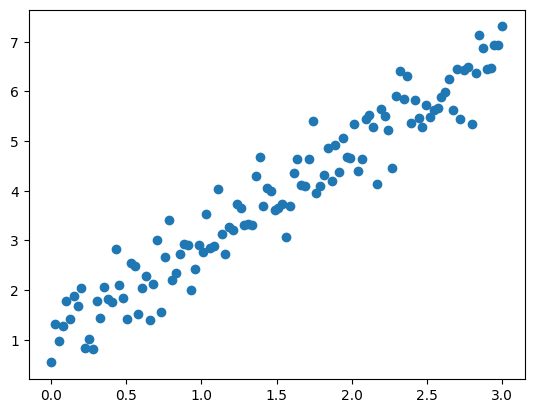

In [14]:
np.random.seed(13) # pick the seed for reproducibility - change it to explore the effects of random variations

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5    # at (*train_x.shape), * in the beginning of a function 
                                                                            # is used to unpack the elements of an iterable (e.g., a list, tuple, or array) 
                                                                            # and pass them as separate arguments to a function.
plt.scatter(train_x,train_labels)

In [15]:
# Let's define our model and loss function

input_dim = 1
output_dim = 1
learning_rate = 0.1

# This is our weight matrix
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32)
# This is our bias vector
b = torch.zeros(size=(output_dim,),requires_grad=True)

def f(x):
    return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

In [16]:
# training the model on a series of minibatches, uing gradient descent

def train_on_batch(x, y):
    predictions = f(x)
    loss = compute_loss(y, predictions)
    loss.backward()
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    w.grad.zero_()
    b.grad.zero_()
    return loss

In [17]:
# Shuffle the data.
indices = np.random.permutation(len(train_x))
features = torch.tensor(train_x[indices],dtype=torch.float32)
labels = torch.tensor(train_labels[indices],dtype=torch.float32)


In [18]:
batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        loss = train_on_batch(features[i:i+batch_size].view(-1,1),labels[i:i+batch_size])   # .view() method is used to reshape a tensor while keeping the same data. 
                                                                                            # -1: It tells PyTorch to compute that dimension such that it maintains the total number of elements.
                                                                                            # 1: This specifies that you want the resulting tensor to have 1 column.
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807


Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


In [19]:
# obtained optimized parameters W and b
#  their values are similar to the original values used when generating the dataset (W = 2, b = 1)
w,b

(tensor([1.8617], requires_grad=True), tensor([1.0711], requires_grad=True))

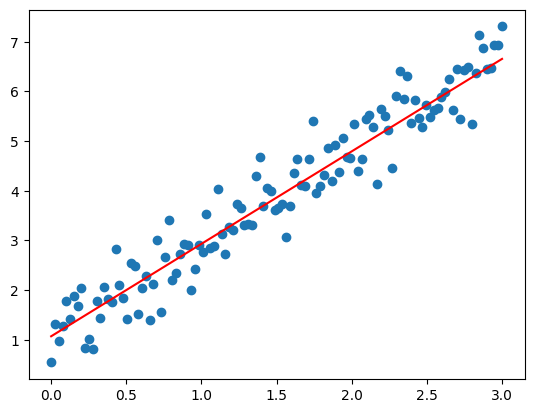

In [20]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])

# Disabling gradient calculation is useful for inference, when you are sure
# that you will not call Tensor.backward(). It will reduce memory consumption for computations that would otherwise have requires_grad=True.
with torch.no_grad():   
    y = w.numpy()*x+b.numpy()
plt.plot(x,y,color='red')

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Doing computations on '+device)

### Changes here: indicate device
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32,device=device)
b = torch.zeros(size=(output_dim,),requires_grad=True,device=device)

def f(x):
    return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

def train_on_batch(x, y):
    predictions = f(x)
    loss = compute_loss(y, predictions)
    loss.backward()
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    w.grad.zero_()
    b.grad.zero_()
    return loss


batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        ### Changes here: move data to required device
        loss = train_on_batch(features[i:i+batch_size].view(-1,1).to(device),labels[i:i+batch_size].to(device)) # move all tensors to this device using a call .to(device)
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))


Doing computations on cpu
Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


In [22]:
print(torch.version.cuda)

None


In [23]:
# Classification

# generating sample data
np.random.seed(0) # pick the seed for reproducibility - change it to explore the effects of random variations

n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.1,class_sep=1.5)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [ 70*n//100, (15+70)*n//100 ]   # The // operator is used for floor division
train_x, valid_x, test_x = np.split(X, split)   # X[0:69,:], X[70:84,:], X[85:99,:]
train_labels, valid_labels, test_labels = np.split(Y, split)    # Y[0:69,:], Y[70:84,:], Y[85:99,:]


In [24]:
def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha=0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,0])
        min_y = min(features[:,1])*(1-.1)   # equivalent to *(1-0.1) = *(0.9)
        max_y = max(features[:,1])*(1+.1)   # equivalent to *(1+0.1) = *(1.1)
        cx = np.array([min_x, max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15524\1674085984.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


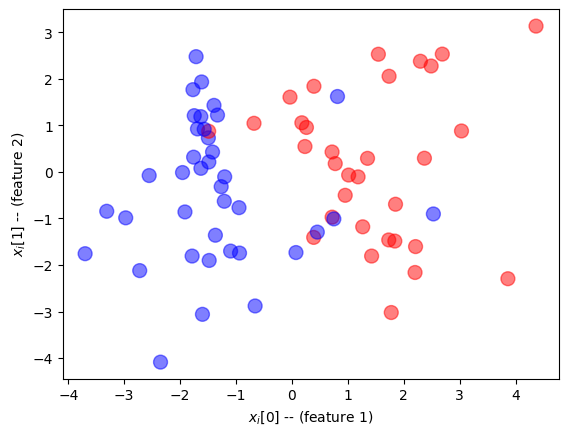

In [25]:
plot_dataset(train_x,train_labels)

In [26]:
# Training One-Layer Perceptron

class Network():
  def __init__(self):
     self.W = torch.randn(size=(2,1),requires_grad=True)
     self.b = torch.zeros(size=(1,),requires_grad=True)

  def forward(self,x):
    return torch.matmul(x,self.W)+self.b

  def zero_grad(self):
    self.W.data.zero_() # used W.data.zero_() instead of W.zero_(), because we cannot directly modify a tensor that is being tracked using Autograd mechanism.
    self.b.data.zero_()

  def update(self,lr=0.1):
    self.W.data.sub_(lr*self.W.grad)
    self.b.data.sub_(lr*self.b)

net = Network()

In [27]:
# The call to binary_cross_entropy_with_logits is equivalent to a call to sigmoid, followed by a call to binary_crossentropy

def train_on_batch(net, x, y):
    z = net.forward(x).flatten()
    loss = torch.nn.functional.binary_cross_entropy_with_logits(input=z,target=y)   # nn stands for 'neural network'
    net.zero_grad()
    loss.backward()
    net.update()
    return loss

In [28]:
# Dataset is the main source of data, it can be either Iterable or Map-style
# Dataloader is responsible for loading the data from a dataset and splitting it into minibatches.

# Create a tf.data.Dataset object for easy batched iteration
dataset = torch.utils.data.TensorDataset(torch.tensor(train_x),torch.tensor(train_labels,dtype=torch.float32))
dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)

list(dataloader)[0]

[tensor([[ 1.5442,  2.5290],
         [-1.6284,  0.0772],
         [-1.7141,  2.4770],
         [-1.4951,  0.7320],
         [-1.6899,  0.9243],
         [-0.9474, -0.7681],
         [ 3.8597, -2.2951],
         [-1.3944,  1.4300],
         [ 4.3627,  3.1333],
         [-1.0973, -1.7011],
         [-2.5532, -0.0777],
         [-1.2661, -0.3167],
         [ 0.3921,  1.8406],
         [ 2.2091, -1.6045],
         [ 1.8383, -1.4861],
         [ 0.7173, -0.9718]]),
 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.])]

In [29]:
for epoch in range(15):
    for (x, y) in dataloader:
        loss = train_on_batch(net,x,y)
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.5273
Epoch 1: last batch loss = 0.4418
Epoch 2: last batch loss = 0.3870
Epoch 3: last batch loss = 0.3487
Epoch 4: last batch loss = 0.3203
Epoch 5: last batch loss = 0.2981
Epoch 6: last batch loss = 0.2803
Epoch 7: last batch loss = 0.2656
Epoch 8: last batch loss = 0.2531
Epoch 9: last batch loss = 0.2425
Epoch 10: last batch loss = 0.2332
Epoch 11: last batch loss = 0.2251
Epoch 12: last batch loss = 0.2179
Epoch 13: last batch loss = 0.2114
Epoch 14: last batch loss = 0.2055


In [30]:
print(net.W,net.b)

tensor([[1.3968],
        [0.3554]], requires_grad=True) tensor([0.], requires_grad=True)


C:\Users\User\AppData\Local\Temp\ipykernel_15524\1674085984.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


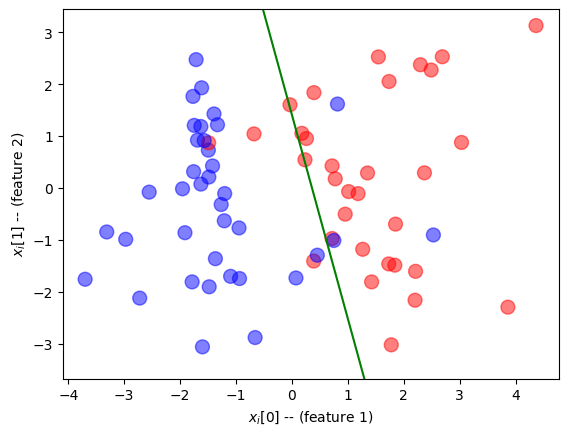

In [31]:
# plotting the line that separates two classes
# Separation line is defined by the equation W * x + b = 0.5 

plot_dataset(train_x,train_labels,net.W.detach().numpy(),net.b.detach().numpy())    
# .detach(): This function is used to create a new tensor that shares data with the original tensor (net.W) but doesn't require gradients to be computed.

In [32]:
# computing the accuracy on the validation dataset

pred = torch.sigmoid(net.forward(torch.tensor(valid_x)))
torch.mean(((pred.view(-1)>0.5)==(torch.tensor(valid_labels)>0.5)).type(torch.float32))


tensor(0.8000)